In [1]:
import sys,os,glob
from astropy.io import fits
from astropy.table import Table
from astropy.nddata import extract_array
from astropy.coordinates import SkyCoord
from astropy import wcs
from astropy.wcs.utils import skycoord_to_pixel
from astropy import units as u
import numpy as np
import matplotlib.pyplot as plt
from astroquery.mast import Observations
from astropy.visualization import (simple_norm,LinearStretch)

import jhat
from jhat import jwst_photclass,st_wcs_align

**WARNING**: LOCAL JWST PRD VERSION PRDOPSSOC-055 DOESN'T MATCH THE CURRENT ONLINE VERSION PRDOPSSOC-059
Please consider updating pysiaf, e.g. pip install --upgrade pysiaf or conda update pysiaf


The following task in the stsci.skypac package can be run with TEAL:
                                    skymatch                                    


In [2]:
obs_table1 = Observations.query_criteria(obs_id='jw02767-o002_t001_nircam_clear-f200w')
data_products_by_obs = Observations.get_product_list(obs_table1)
data_products_by_obs = data_products_by_obs[data_products_by_obs['calib_level']==2]
data_products_by_obs = data_products_by_obs[data_products_by_obs['productSubGroupDescription']=='CAL'][0]
Observations.download_products(data_products_by_obs,extension='fits')

Local Path,Status,Message,URL
str92,str8,object,object
./mastDownload/JWST/jw02767002001_02105_00001_nrcb1/jw02767002001_02105_00001_nrcb1_cal.fits,COMPLETE,None,None


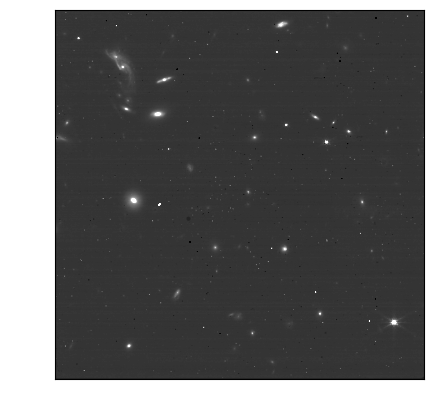

In [3]:
ref_image = glob.glob('mastDownload/JWST/*nrcb1*/*cal.fits')[0]

ref_fits = fits.open(ref_image)
ref_data = fits.open(ref_image)['SCI',1].data
norm1 = simple_norm(ref_data,stretch='linear',min_cut=-.5,max_cut=3)

plt.imshow(ref_data, origin='lower',
                      norm=norm1,cmap='gray')
plt.gca().tick_params(labelcolor='none',axis='both',color='none')
plt.show()

In [4]:
wcs_align = st_wcs_align()
wcs_align.run_all(ref_image,
              telescope='jwst',
              outsubdir='mastDownload',
          overwrite=True,
          d2d_max=2,
          showplots=2,
          refcatname='HST',
          histocut_order='dxdy',
              sharpness_lim=(0,10),
              roundness1_lim=(-10, 10),
              SNR_min= 3,
              objmag_lim =(10,26))


2022-12-15 12:53:33,314 - stpipe - WARNING - /Users/jpierel/miniconda3/envs/tweakreg/lib/python3.10/site-packages/astropy/wcs/wcs.py:725: FITSFixedWarning: 'datfix' made the change 'Set DATE-BEG to '2022-10-06T11:53:40.294' from MJD-BEG.
Set DATE-AVG to '2022-10-06T11:55:54.503' from MJD-AVG.
Set DATE-END to '2022-10-06T11:58:08.713' from MJD-END'.
  warnings.warn(

2022-12-15 12:53:33,315 - stpipe - WARNING - /Users/jpierel/miniconda3/envs/tweakreg/lib/python3.10/site-packages/astropy/wcs/wcs.py:725: FITSFixedWarning: 'obsfix' made the change 'Set OBSGEO-L to     5.077932 from OBSGEO-[XYZ].
Set OBSGEO-B to    20.608391 from OBSGEO-[XYZ].
Set OBSGEO-H to 1233387581.361 from OBSGEO-[XYZ]'.
  warnings.warn(

2022-12-15 12:53:33,550 - stpipe - WARNING - /Users/jpierel/miniconda3/envs/tweakreg/lib/python3.10/site-packages/astropy/stats/sigma_clipping.py:411: AstropyUserWarning: Input data contains invalid values (NaNs or infs), which were automatically clipped.
  warnings.warn('Input data 

GETTING HST CATALOG


RuntimeError: Don't know what to do with reference catalog HST! Not a known refcat, and not a file!